# Setting

Run: ./eval_logits.py

We evaluate on wikitext text dataset, text 2179 sentences, with 418776 tokens
Saturate event: the max logits index doesn't change for deep layers and the same as last prediction
For each token we compute the saturate event happened on which layer





# GPT2 result

average Saturate Event **76741/418776**, Percentage:**0.18325197606497368**
Saturate event count for each layer[ 27840.   1350.   2103.   3551.   5116.   5654.  4797.  8554.   9080. 8879.   5894. 335958.]

# Aligned GPT2 result

Average Saturate Event 199820/418776, Percentage:0.47715376217980193
Saturate event count for each layer[ 44636.  21181.  11975.  11000.   9946.  16599.  19712.  13938.  13235. 16897.  20701. 218956.]

# Multiexit GPT2 Result
steps 22000
Average Saturate Event 304102/418776, Percentage:0.726169628772311
Saturate event count for each layer[114124.  21897.  13392.   6810.   6589.   4329.   4434.   4398.  49557.
  37410.  44959. 110877.]

In [6]:
cos_standard_gpt2 = [0.0512, 0.0582, 0.0749, 0.0898, 0.0987, 0.1082, 0.1224, 0.1345, 0.1497, 0.1697, 0.2724, 1.0]

cos_aligned_gpt2 = [0.016, 0.0191, 0.0222, 0.0293, 0.0378, 0.0505, 0.0598, 0.0684, 0.085, 0.1347, 0.4838, 1.0]


saturate_standard_gpt2 = [27840, 1350, 2103, 3551, 5116, 5654, 4797, 8554, 9080, 8879, 5894, 335958]
saturate_aligned_gpt2 = [44636, 21181, 11975, 11000, 9946, 16599, 19712, 13938, 13235, 16897, 20701, 218956]

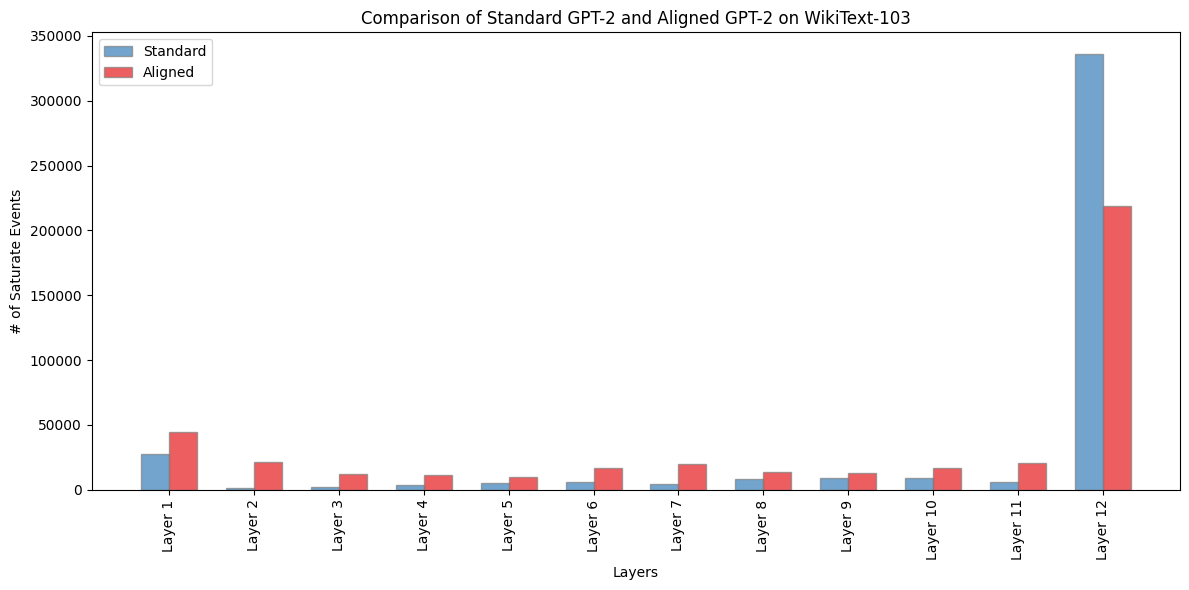

In [7]:
import matplotlib.pyplot as plt
import numpy as np

palette = {
    'orange': '#FF7F00',
    'green': '#4DAF4A',
    'blue': '#377EB8',
    'red': '#E41A1C',
    'brown': '#452600',
    'yellow': '#FFD92F',
}

# Labels for the x-axis
labels = [f'Layer {i+1}' for i in range(len(saturate_standard_gpt2))]

# Number of bars
n = len(saturate_standard_gpt2)

# Bar width
bar_width = 0.33

# Positions of the bars on the x-axis
r1 = np.arange(n)
r2 = [x + bar_width for x in r1]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart on the left y-axis
ax1.bar(r1, saturate_standard_gpt2, color=palette['blue'], width=bar_width, edgecolor='grey', label='Standard', alpha=0.7)
ax1.bar(r2, saturate_aligned_gpt2, color=palette['red'], width=bar_width, edgecolor='grey', label='Aligned', alpha=0.7)

# Set labels and title
ax1.set_xlabel('Layers')
ax1.set_ylabel('# of Saturate Events')
plt.title('Comparison of Standard GPT-2 and Aligned GPT-2 on WikiText-103')

# Set x-ticks in the middle of two bars
plt.xticks([r + bar_width/2 for r in range(n)], labels, rotation=90)

# Add legends
ax1.legend(loc='upper left')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('gpt2_saturate_events.png', bbox_inches='tight', dpi=300)

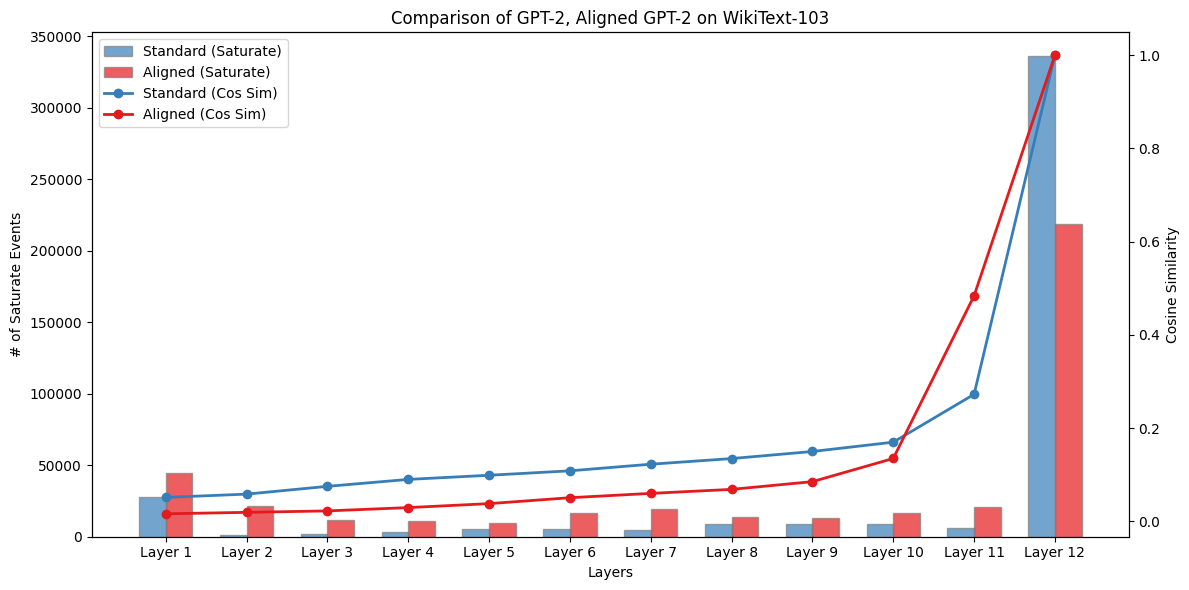

In [8]:
import matplotlib.pyplot as plt
import numpy as np

palette = {
    'orange': '#FF7F00',
    'green': '#4DAF4A',
    'blue': '#377EB8',
    'red': '#E41A1C',
    'brown': '#452600',
    'yellow': '#FFD92F',
}

# Labels for the x-axis
labels = [f'Layer {i+1}' for i in range(len(saturate_standard_gpt2))]

# Number of bars
n = len(saturate_standard_gpt2)

# Bar width
bar_width = 0.33

# Positions of the bars on the x-axis
r1 = np.arange(n)
r2 = [x + bar_width for x in r1]

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot bar chart on the left y-axis
ax1.bar(r1, saturate_standard_gpt2, color=palette['blue'], width=bar_width, edgecolor='grey', label='Standard (Saturate)', alpha=0.7)
ax1.bar(r2, saturate_aligned_gpt2, color=palette['red'], width=bar_width, edgecolor='grey', label='Aligned (Saturate)', alpha=0.7)

# Plot line chart on top of the bar chart
r_middle = [r + bar_width/2 for r in r1]
ax2.plot(r_middle, cos_standard_gpt2, color=palette['blue'], marker='o', linestyle='-', label='Standard (Cos Sim)', linewidth=2, markersize=6)
ax2.plot(r_middle, cos_aligned_gpt2, color=palette['red'], marker='o', linestyle='-', label='Aligned (Cos Sim)', linewidth=2, markersize=6)

# Set labels and title
ax1.set_xlabel('Layers')
ax1.set_ylabel('# of Saturate Events')
ax2.set_ylabel('Cosine Similarity')
plt.title('Comparison of GPT-2, Aligned GPT-2 on WikiText-103')

# Set x-ticks in the middle of two bars
plt.xticks([r + bar_width/2 for r in range(n)], labels, rotation=90)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('saturate_events_and_cos_sim_gpt2.png', bbox_inches='tight', dpi=300)


In [9]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='#67B1D7', edgecolor='grey')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Aligned GPT-2 relative to GPT-2')
# plt.show()

plt.savefig('offset_layers.png', bbox_inches='tight', dpi=300)


ValueError: operands could not be broadcast together with shapes (418776,) (12,) 

{-11: 2917, -10: 676, -9: 1130, -8: 768, -7: 882, -6: 1263, -5: 1625, -4: 2447, -3: 2767, -2: 3351, -1: 3369, 0: 119015, 1: 44458, 2: 37757, 3: 52061, 4: 8455, 5: 8406, 6: 7402, 7: 11891, 8: 11256, 9: 13932, 10: 18573, 11: 64375}


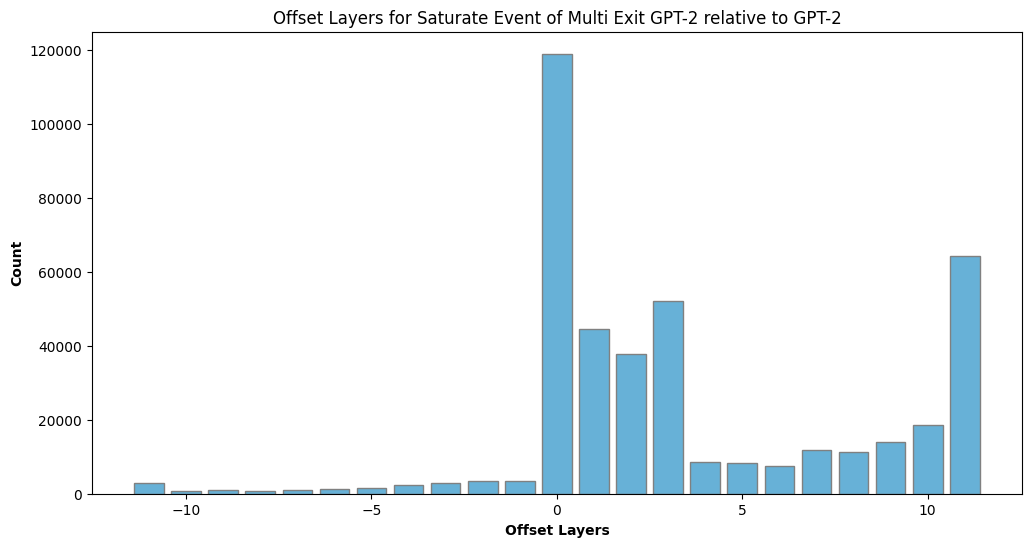

In [ ]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
multiexit_gpt2_saturate_event = np.load('multiexitgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(multiexit_gpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='#67B1D7', edgecolor='grey')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Multi Exit GPT-2 relative to GPT-2')
# plt.show()
plt.savefig('offset_layers_multiexit.png', bbox_inches='tight', dpi=300)

{-11: 24149, -10: 12675, -9: 11211, -8: 8992, -7: 8485, -6: 8111, -5: 8875, -4: 8145, -3: 48184, -2: 43599, -1: 56443, 0: 110448, 1: 11576, 2: 12334, 3: 6854, 4: 6668, 5: 6016, 6: 7030, 7: 4194, 8: 3822, 9: 3536, 10: 4124, 11: 3305}


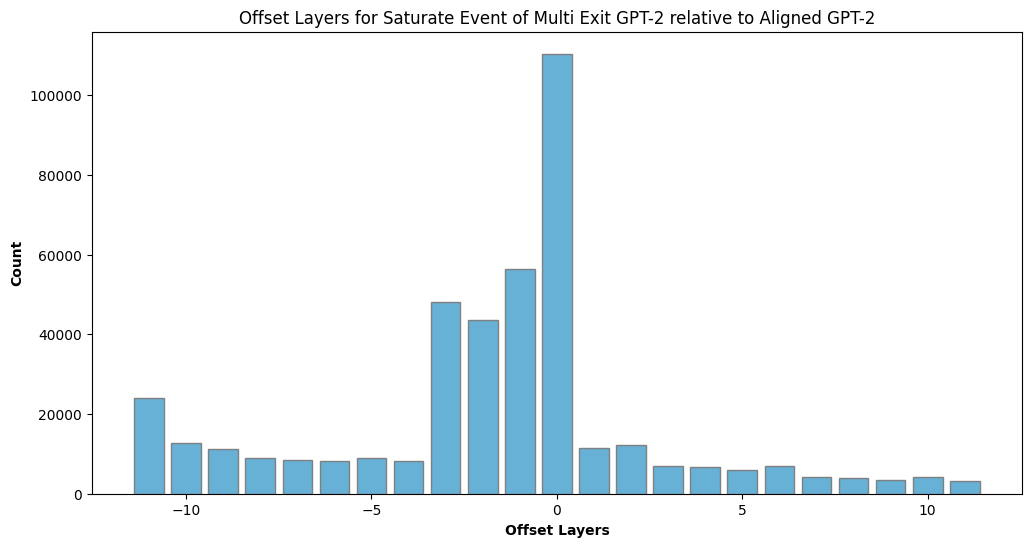

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')
multiexit_gpt2_saturate_event = np.load('multiexitgpt2_saturate_event.npy')

offset_layers = np.array(multiexit_gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='#67B1D7', edgecolor='grey')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Multi Exit GPT-2 relative to Aligned GPT-2')
plt.show()